In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Drop features: Ticket, PassengerId, Name

# Examing data and dicide which feature should be droped or modified

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

train.head()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()
# Age interval(0,80)
# Fare inteval (0,515)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Age should be put into intervals, there would be less groups 

In [8]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [10]:
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [11]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [12]:
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


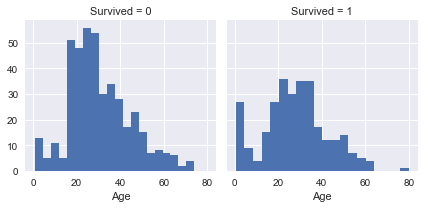

In [13]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

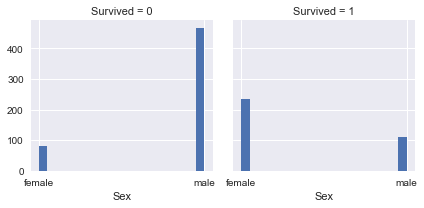

In [14]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

We can see from the graph that femal has much higher servival rate than male passangers.

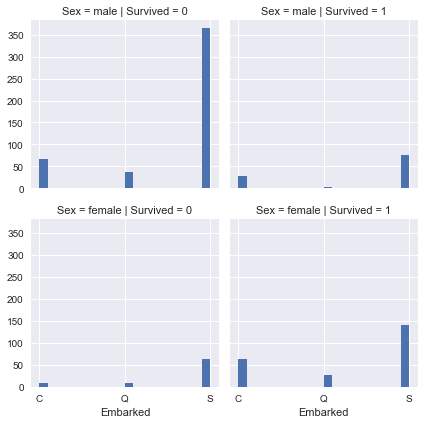

In [15]:
g = sns.FacetGrid(train,row = 'Sex' ,col='Survived')
g.map(plt.hist, 'Embarked', bins=20)

palette : palette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

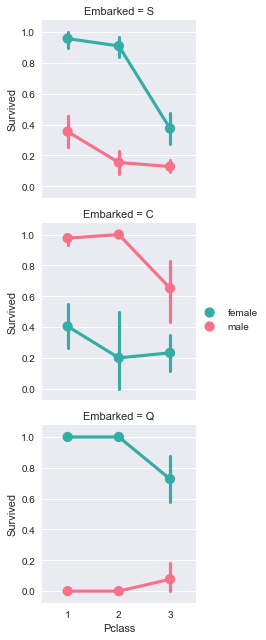

In [16]:
grid = sns.FacetGrid(train, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',palette='husl')
grid.add_legend()

# Conclusion:
Survival rate is realted to features:'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch'
 'Fare' 'Cabin' 'Embarked'

In [17]:
# First put age into bins 
#train['Ageband'] = pd.cut(train['Age'],bins = 15)

In [18]:
#train = train.drop(['Ageband'], axis=1)
#test = test.drop(['Ageband'], axis=1)

In [19]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [20]:
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [21]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [22]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [23]:
#train.replace(['male','female'],[0,1])

In [24]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [25]:
for index,row in train.iterrows():
    if row['Sex'] == 'male':
        train.loc[index,'Sex'] = 0
    else:
        train.loc[index,'Sex'] = 1

In [26]:
for index,row in test.iterrows():
    if row['Sex'] == 'male':
        test.loc[index,'Sex'] = 0
    else:
        test.loc[index,'Sex'] = 1

In [27]:
#train['Age'].astype('int64')

The rows you get back from iterrows are copies that are no longer connected to the original data frame, so edits don't change your dataframe.

https://stackoverflow.com/questions/25478528/updating-value-in-iterrow-for-pandas

In [28]:
for index,row in train.iterrows():
    #print(row['Age'])
    if row['Age']>0 and row['Age'] <= 5:
        train.loc[index,'Age'] = 1
        #row['Age'] = 1
    elif row['Age']>5 and row['Age'] <= 10:
        train.loc[index,'Age'] = 2
    elif row['Age']>10 and row['Age'] <= 15:
        train.loc[index,'Age'] = 3
    elif row['Age']>15 and row['Age'] <= 20:
        train.loc[index,'Age'] = 4
    elif row['Age']>20 and row['Age'] <= 25:
        train.loc[index,'Age'] = 5
    elif row['Age']>25 and row['Age'] <= 30:
        train.loc[index,'Age'] = 6
    elif row['Age']>30 and row['Age'] <= 35:
        train.loc[index,'Age'] = 7
    elif row['Age']>35 and row['Age'] <= 40:
        train.loc[index,'Age'] = 8
    elif row['Age']>40 and row['Age'] <= 45:
        train.loc[index,'Age'] = 9
    elif row['Age']>45 and row['Age'] <= 50:
        train.loc[index,'Age'] = 10
    elif row['Age']>50 and row['Age'] <= 55:
        train.loc[index,'Age'] = 11
    elif row['Age']>55 and row['Age'] <= 60:
        train.loc[index,'Age'] = 12
    elif row['Age']>60 and row['Age'] <= 65:
        train.loc[index,'Age'] = 13
    elif row['Age']>65 and row['Age'] <= 70:
        train.loc[index,'Age'] = 14
    elif row['Age']>70 and row['Age'] <= 75:
        train.loc[index,'Age'] = 15
    elif row['Age']>75:
        train.loc[index,'Age'] = 16
    else:
        train.loc[index,'Age'] = 0
    #print(row['Age'])

In [29]:
for index,row in test.iterrows():
    #print(row['Age'])
    if row['Age']>0 and row['Age'] <= 5:
        test.loc[index,'Age'] = 1
    elif row['Age']>5 and row['Age'] <= 10:
        test.loc[index,'Age'] = 2
    elif row['Age']>10 and row['Age'] <= 15:
        test.loc[index,'Age'] = 3
    elif row['Age']>15 and row['Age'] <= 20:
        test.loc[index,'Age'] = 4
    elif row['Age']>20 and row['Age'] <= 25:
        test.loc[index,'Age'] = 5
    elif row['Age']>25 and row['Age'] <= 30:
        test.loc[index,'Age'] = 6
    elif row['Age']>30 and row['Age'] <= 35:
        test.loc[index,'Age'] = 7
    elif row['Age']>35 and row['Age'] <= 40:
        test.loc[index,'Age'] = 8
    elif row['Age']>40 and row['Age'] <= 45:
        test.loc[index,'Age'] = 9
    elif row['Age']>45 and row['Age'] <= 50:
        test.loc[index,'Age'] = 10
    elif row['Age']>50 and row['Age'] <= 55:
        test.loc[index,'Age'] = 11
    elif row['Age']>55 and row['Age'] <= 60:
        test.loc[index,'Age'] = 12
    elif row['Age']>60 and row['Age'] <= 65:
        test.loc[index,'Age'] = 13
    elif row['Age']>65 and row['Age'] <= 70:
        test.loc[index,'Age'] = 14
    elif row['Age']>70 and row['Age'] <= 75:
        test.loc[index,'Age'] = 15
    elif row['Age']>75:
        test.loc[index,'Age'] = 16
    else:
        test.loc[index,'Age'] = 0
    #print(row['Age'])

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,5.0,1,0,7.2500,NaN,S
1,1,1,1,8.0,1,0,71.2833,C85,C
2,1,3,1,6.0,0,0,7.9250,NaN,S
3,1,1,1,7.0,1,0,53.1000,C123,S
4,0,3,0,7.0,0,0,8.0500,NaN,S


In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,7.0,0,0,7.8292,NaN,Q
1,3,1,10.0,1,0,7.0000,NaN,S
2,2,0,13.0,0,0,9.6875,NaN,Q
3,3,0,6.0,0,0,8.6625,NaN,S
4,3,1,5.0,1,1,12.2875,NaN,S


In [32]:
# find the most frequent value
freq_port = train["Embarked"].dropna().mode()[0]
freq_port

'S'

inplace : boolean, default False
If True, fill in place. Note: this will modify any other views on this object, (e.g. a no-copy slice for a column in a DataFrame).

In [33]:
train['Embarked'].fillna('S',inplace=True)
test['Embarked'].fillna('S',inplace=True)

In [34]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [36]:
# replace string value into int value for 'Embarked'
for index,row in test.iterrows():
    if row['Embarked'] == 'S':
        test.loc[index, 'Embarked'] = 0
    elif row['Embarked'] == 'C':
        test.loc[index, 'Embarked'] = 1
    else:
        test.loc[index, 'Embarked'] = 2

In [37]:
# replace string value into int value for 'Embarked'
for index,row in train.iterrows():
    if row['Embarked'] == 'S':
        train.loc[index, 'Embarked'] = 0
    elif row['Embarked'] == 'C':
        train.loc[index, 'Embarked'] = 1
    else:
        train.loc[index, 'Embarked'] = 2

In [38]:
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,5.081930,0.523008,0.381594,32.204208
std,0.486592,0.836071,3.621257,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,5.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,7.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,16.000000,8.000000,6.000000,512.329200


In [41]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,2.265550,5.133971,0.447368,0.392344,35.627188
std,0.841838,3.614021,0.896760,0.981429,55.907576
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,7.895800
50%,3.000000,5.000000,0.000000,0.000000,14.454200
75%,3.000000,7.750000,1.000000,0.000000,31.500000
max,3.000000,16.000000,8.000000,9.000000,512.329200


In [42]:
train = train.astype({'Sex':'int64'},copy=False)
train = train.astype({'Embarked':'int64'},copy=False)
test = test.astype({'Sex':'int64'},copy=False)
test = test.astype({'Embarked':'int64'},copy=False)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [44]:
# process test data
test.isnull().any()
test['Fare'].mean()
test['Fare'].fillna(35.6271884892086,inplace = True)

In [45]:
# format class label and features
train_x = train.drop(['Survived'],axis=1)
train_y = train['Survived']
test_x = test

In [50]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
test_y = logreg.predict(test_x)


79.349999999999994

# The kernel function can be any of the following:

linear: \langle x, x'\rangle.

polynomial: (\gamma \langle x, x'\rangle + r)^d. d is specified by keyword degree, r by coef0.

rbf: \exp(-\gamma \|x-x'\|^2). \gamma is specified by keyword gamma, must be greater than 0.

sigmoid (\tanh(\gamma \langle x,x'\rangle + r)), where r is specified by coef0.

In [53]:
# Support Vector Machines
# you have to specify parameter for kernels
svc = SVC(kernel='linear')
svc.fit(train_x, train_y)
test_y = svc.predict(test_x)


In [46]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
test_y = gaussian.predict(test_x)


79.010000000000005

In [47]:
# reandom forest
random_forest = RandomForestClassifier(n_estimators=900,min_samples_split = 6,min_samples_leaf = 3)
random_forest.fit(train_x, train_y)
test_y = random_forest.predict(test_x)
random_forest.score(train_x, train_y)


89.450000000000003

In [54]:
temp = pd.read_csv('test.csv')
ID = list(temp['PassengerId'])

In [55]:
sv = list(test_y)

In [56]:
dic = {'PassengerId':ID,'Survived':sv}

In [57]:
result = pd.DataFrame(dic)

In [58]:
result.to_csv('Result.csv',index= False)